In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [31]:
path = '/home/ashu/Desktop/dataset/Smarttanken.de'

In [32]:
df = pd.read_csv(os.path.join(path, 'train_val_new.csv'), header=None,
                         names=['status', 'identifier', 'outlet', 'time_stamp'])
df.head()

,status,identifier,outlet,time_stamp
0,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 15:15:00+00
1,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 15:30:00+00
2,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 15:45:00+00
3,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 16:00:00+00
4,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 16:15:00+00


In [33]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], infer_datetime_format=True)
# replace nan with undefined status
df.status.fillna('undefiniert', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8442523 entries, 0 to 8442522
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   status      object        
 1   identifier  object        
 2   outlet      int64         
 3   time_stamp  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 257.6+ MB


In [34]:
len(df.identifier.unique())

742

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lbe = LabelEncoder()
df["label"] = lbe.fit_transform(df["status"])
df.head()

,status,identifier,outlet,time_stamp,label
0,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 15:15:00,1
1,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 15:30:00,1
2,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 15:45:00,1
3,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 16:00:00,1
4,frei,0%2F3sPZmsccmn6oDI3pMCyw%3D%3D,1,2020-05-26 16:15:00,1


In [37]:
lbe_map = dict(zip(lbe.classes_, lbe.transform(lbe.classes_)))
print(lbe_map)

{'defekt': 0, 'frei': 1, 'in Nutzung': 2, 'in Wartung': 3, 'nicht verfügbar': 4, 'undefiniert': 5}


In [45]:
lbe_inv_map = dict(zip(lbe.transform(lbe.classes_), lbe.classes_))
print(lbe_inv_map)

{0: 'defekt', 1: 'frei', 2: 'in Nutzung', 3: 'in Wartung', 4: 'nicht verfügbar', 5: 'undefiniert'}


In [38]:
df.shape

(8442523, 5)

In [39]:
new_df = pd.pivot_table(df, values='label',
              index=['time_stamp'],
              columns=['identifier', 'outlet'],
              fill_value=lbe_map['nicht verfügbar'],
                   dropna=True)

In [40]:
new_df = new_df.reindex(pd.date_range(start=df.time_stamp.min(), end=df.time_stamp.max(), freq='15min'),
                                fill_value=lbe_map['nicht verfügbar'])

In [41]:
new_df

identifier          %2B%2F6ysm7JUCD4nt%2F4R%2F7Ctw%3D%3D        \
outlet                                                 1  2  3   
2020-05-26 15:15:00                                    5  5  5   
2020-05-26 15:30:00                                    5  5  5   
2020-05-26 15:45:00                                    5  5  5   
2020-05-26 16:00:00                                    5  5  5   
2020-05-26 16:15:00                                    5  5  5   
...                                                  ... .. ..   
2020-07-21 05:00:00                                    5  5  5   
2020-07-21 05:15:00                                    5  5  5   
2020-07-21 05:30:00                                    5  5  5   
2020-07-21 05:45:00                                    5  5  5   
2020-07-21 06:00:00                                    5  5  5   

identifier          %2B0yK7tOdQR6N4itRfnomrw%3D%3D           \
outlet                                           1  2  3  4   
2020-05-26 15:15:00                              1  1  1  1   
2020-05-26 15:30:00                              1  1  1  1   
2020-05-26 15:45:00                              1  1  1  1   
2020-05-26 16:00:00                              1  1  1  1   
2020-05-26 16:15:00                              1  1  1  1   
...                                            ... .. .. ..   
2020-07-21 05:00:00                              1  1  1  1   
2020-07-21 05:15:00                              1  1  1  1   
2020-07-21 05:30:00                              1  1  1  1   
2020-07-21 05:45:00                              1  1  1  1   
2020-07-21 06:00:00                              1  1  1  1   

identifier          %2B38e7VYAw%2FfARVpg80aRHQ%3D%3D     \
outlet                                             1  2   
2020-05-26 15:15:00                                1  1   
2020-05-26 15:30:00                                1  1   
2020-05-26 15:45:00                                1  1   
2020-05-26 16:00:00                                1  1   
2020-05-26 16:15:00                                1  1   
...                                              ... ..   
2020-07-21 05:00:00                                1  1   
2020-07-21 05:15:00                                1  1   
2020-07-21 05:30:00                                1  1   
2020-07-21 05:45:00                                1  1   
2020-07-21 06:00:00                                1  1   

identifier          %2B7Y777gKyYOiBxPkxN9iSw%3D%3D  ...  \
outlet                                           1  ...   
2020-05-26 15:15:00                              5  ...   
2020-05-26 15:30:00                              5  ...   
2020-05-26 15:45:00                              5  ...   
2020-05-26 16:00:00                              5  ...   
2020-05-26 16:15:00                              5  ...   
...                                            ...  ...   
2020-07-21 05:00:00                              5  ...   
2020-07-21 05:15:00                              5  ...   
2020-07-21 05:30:00                              5  ...   
2020-07-21 05:45:00                              5  ...   
2020-07-21 06:00:00                              5  ...   

identifier          zaGWmko9y4Yc2oIN58dBgQ%3D%3D     \
outlet                                         1  2   
2020-05-26 15:15:00                            2  1   
2020-05-26 15:30:00                            2  1   
2020-05-26 15:45:00                            2  1   
2020-05-26 16:00:00                            2  1   
2020-05-26 16:15:00                            2  1   
...                                          ... ..   
2020-07-21 05:00:00                            1  1   
2020-07-21 05:15:00                            1  1   
2020-07-21 05:30:00                            1  1   
2020-07-21 05:45:00                            1  1   
2020-07-21 06:00:00                            1  1   

identifier          zhus4f6JHZHcs2Q5sNfSiQ%3D%3D     \
outlet        

In [42]:
index = []
for i in range(new_df.shape[1]):
    if 2 in new_df.iloc[:, i].unique():
        index.append(i)
print(len(index))

1184


In [43]:
c_0 = 0
c_1 = 0
c_2 = 0
c_3 = 0
c_4 = 0
c_5 = 0

In [44]:
for idx in index:
    data = new_df.iloc[:,idx].tolist()
    for d in data:
        if d == 0:
            c_0 += 1
        if d == 1:
            c_1 += 1
        if d == 2:
            c_2 += 1
        if d == 3:
            c_3 += 1
        if d == 4:
            c_4 += 1
        if d == 5:
            c_5 += 1

tot = c_0 + c_1 + c_2 + c_3 + c_4 + c_5
print('0 :', str(c_0/float(tot)))
print('1 :', str(c_1/float(tot)))
print('2 :', str(c_2/float(tot)))
print('3 :', str(c_3/float(tot)))
print('4 :', str(c_4/float(tot)))
print('5 :', str(c_5/float(tot)))

0 : 0.003670032391942504
1 : 0.8386163199716571
2 : 0.08929895485373013
3 : 0.0020689404291932383
4 : 0.03828449235752607
5 : 0.028061259995951007


In [51]:
label_count = np.zeros(6, dtype=int)

In [52]:
for idx in index:
    data = new_df.iloc[:,idx].tolist()
    for d in data:
        label_count[d] +=1

In [53]:
print(label_count)

[  23204 5302202  564598   13081  242056  177419]


In [56]:
lbe_map.keys()

dict_keys(['defekt', 'frei', 'in Nutzung', 'in Wartung', 'nicht verfügbar', 'undefiniert'])

In [105]:
plt.style.available[:]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

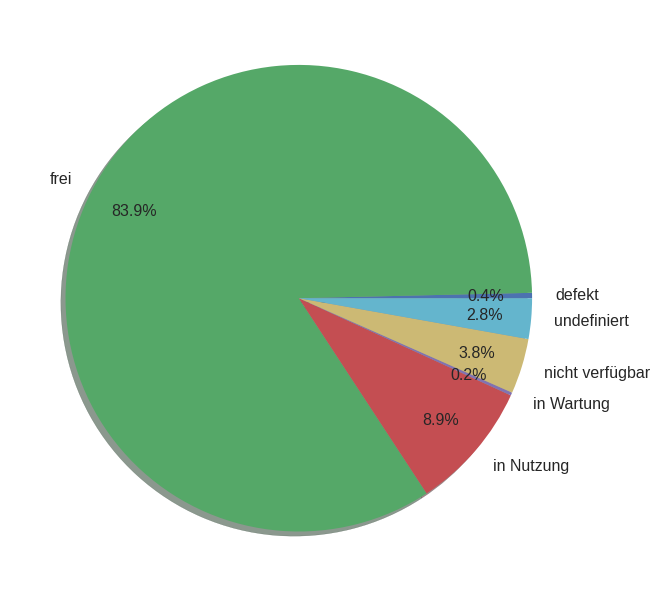

In [117]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.style.use('seaborn')
explode = (0, 0.0, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax = plt.subplots(figsize=(10,10))
wedges, texts, autotexts = ax.pie(label_count,  labels=lbe_map.keys() ,autopct='%1.1f%%', 
                       shadow=True, pctdistance=0.8)

plt.setp(autotexts, size=16)
plt.setp(texts, size=16)
    
#ax.axis('equal' )  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()